# Projeto 1 - IBM - RH - Análise de desempenho e atritos de funcionários

Este conjunto de dados foi criado pela equipe de cientistas de dados da IBM com o objetivo de ser usado de maneira educacional. Iremos criar uma variável chamada de turnover (rotatividade) para ser usada como variável dependente. Esta variável demonstra que o funcionário poderá sair da empresa.

# Sobre este projeto

Os principais pontos que serão avaliados:
*   Levantamento de hipóteses
*   Manipulação de dados e criação de gráficos simples com o Pandas
*   Criar um modelo de classificação

# Preparação do ambiente

*   Para este projeto, acessem o link - https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset e logo abaixo cliquem em "Download". Caso voce não tenha uma conta no Kaggle, crie uma e retorne para esse ponto para realizar o download. Descompacte o arquivo.
*   Crie a variável **turnover** seguindo os passos abaixo:

`dados['turnover'] = dados.replace({'Attrition': {'Yes':1, 'No': 0}})`

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
def metricas(y_test, y_pred):
  print(f'Acurácia: {accuracy_score(y_test, y_pred):.4f}')
  print(f'Precisão: {precision_score(y_test, y_pred):.4f}')
  print(f'Recall: {recall_score(y_test, y_pred):.4f}')

In [ ]:
df = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df['turnover'] = df['Attrition'].map({'Yes':1, 'No': 0})
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,turnover
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0


In [ ]:
print(df.shape,"\n\n")
for i in range(0,len(df.columns)):
  print(f"Coluna {df.columns[i]}\n")
  print(df.iloc[:,i].describe(),"\n")
  print(f"Nulos: {df.iloc[:,i].isnull().any()}\n")
  print(df.iloc[:,i].unique())
  print("\n\n---------------------------------------------------------------------------------------------\n\n")

(1470, 36) 


Coluna Age

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64 

Nulos: False

[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]


---------------------------------------------------------------------------------------------


Coluna Attrition

count     1470
unique       2
top         No
freq      1233
Name: Attrition, dtype: object 

Nulos: False

['Yes' 'No']


---------------------------------------------------------------------------------------------


Coluna BusinessTravel

count              1470
unique                3
top       Travel_Rarely
freq               1043
Name: BusinessTravel, dtype: object 

Nulos: False

['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']


--------------------------------------------------------------------------

In [ ]:
# Ajuste de variáveis binárias
# 'Attrition' foi ajustada para 1 e 0 na variável 'turnover' (target)

df['OverTime'] = df['OverTime'].map({'Yes':1, 'No':0})
df['Gender'] = df['Gender'].map({'Female':1, 'Male':0})
df['PerformanceRating'] = df['PerformanceRating'].map({3:1, 4:0}) # Apesar de não ser binária, a variável 'PerformanceRating' apresenta apenas dois valores unicos (dos 4 possiveis), então a variável pode ser tratada dessa forma.
df = df.drop(['Over18', 'EmployeeCount', 'StandardHours', 'EmployeeNumber'], axis = 1) # Colunas 'Over18','EmployeeCount','StandardHours' possuem apenas um valor unico. 'EmployeeNumber' é um ID.

print(df.shape,"\n\n")
for i in range(0,len(df.columns)):
  print(f"Coluna {df.columns[i]}\n")
  print(df.iloc[:,i].describe(),"\n")
  print(f"Nulos: {df.iloc[:,i].isnull().any()}\n")
  print(df.iloc[:,i].unique())
  print("\n\n---------------------------------------------------------------------------------------------\n\n")

(1470, 32) 


Coluna Age

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64 

Nulos: False

[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]


---------------------------------------------------------------------------------------------


Coluna Attrition

count     1470
unique       2
top         No
freq      1233
Name: Attrition, dtype: object 

Nulos: False

['Yes' 'No']


---------------------------------------------------------------------------------------------


Coluna BusinessTravel

count              1470
unique                3
top       Travel_Rarely
freq               1043
Name: BusinessTravel, dtype: object 

Nulos: False

['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']


--------------------------------------------------------------------------

# Exercicio 1. (2 pontos)

Realize uma análise sobre as variáveis independentes em relação a variável turnover. Quais ideias você obteve? Faça uma pequena apresentação de três a quatro gráficos e escreva suas percepções abaixo de cada um.

Como estamos lidando com uma variável dependente que define se um funcionário poderá ou não sair de uma empresa, a melhor análise está nas variáveis que tornam este funcionário descontente com sua situação atual dentro de uma empresa.  

A análise a seguir apresenta a frequência de todas as variáveis para que possamos ter noção prévia sobre quais possuem uma grande correlação com a variável 'turnover'.

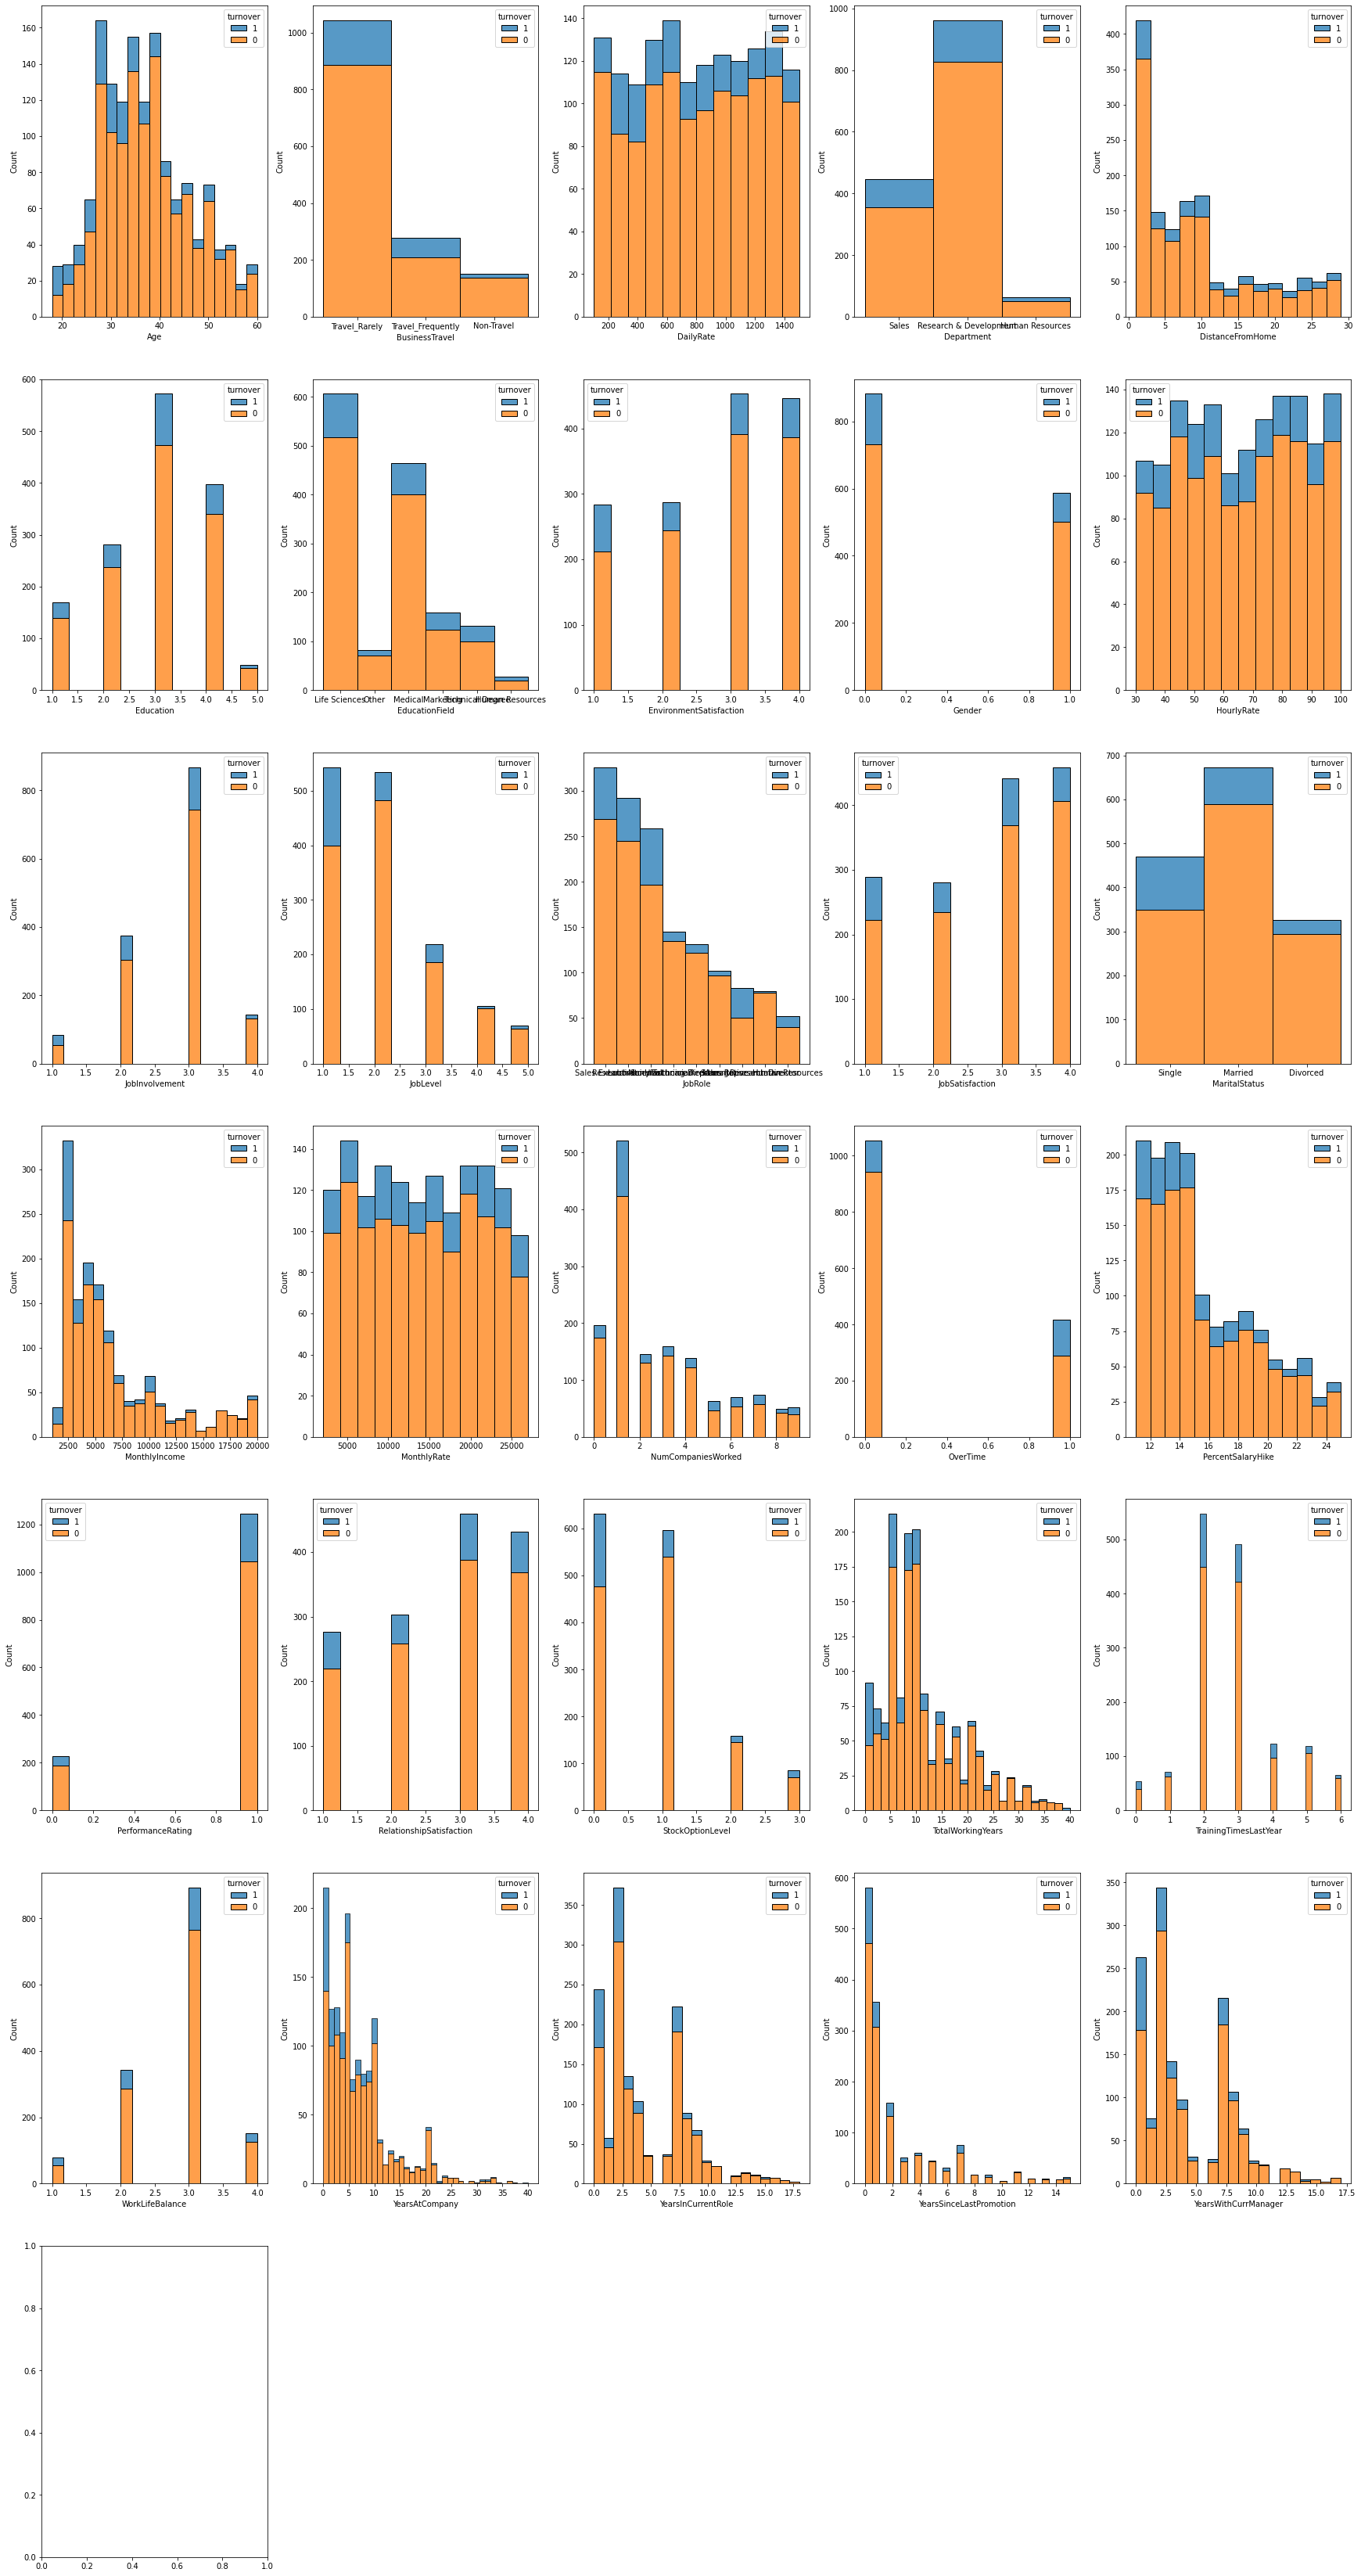

In [ ]:
fig, axes = plt.subplots(7, 5, figsize=(30,60))
axes = axes.flatten()
df_grafico = df.drop(['turnover', 'Attrition'], axis=1)

for i in range(0,len(df_grafico.columns)):
  sns.histplot(x = df_grafico.columns[i], data = df, hue = df['turnover'], hue_order=[1,0], palette = 'tab10', multiple='stack', ax=axes[i])

fig.delaxes(axes[34])
fig.delaxes(axes[33])
fig.delaxes(axes[32])
fig.delaxes(axes[31])
fig.delaxes(axes[30])

plt.show()

Ao análisar as visualizações, percebemos que algumas variáveis possuem alguma correlação com a variável 'turnover'. A variável 'YearAtCompany' por exemplo, indica que funcionários sem uma carreira bem estabelecida são mais propicios a sair.

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'turnover'],
      dtype='object')

Das variáveis obtidas em '**df.columns**' existem algumas que podem estar diretamente ligadas a vontade de sair de uma empresa. Na indústria de jogos, por exemplo, há uma expressão chamada '*crunch culture*' que refere-se a jornadas de trabalho longas e exaustivas. No dataset da IBM temos a variável 'OverTime' que indica justamente a prática de horas extras.



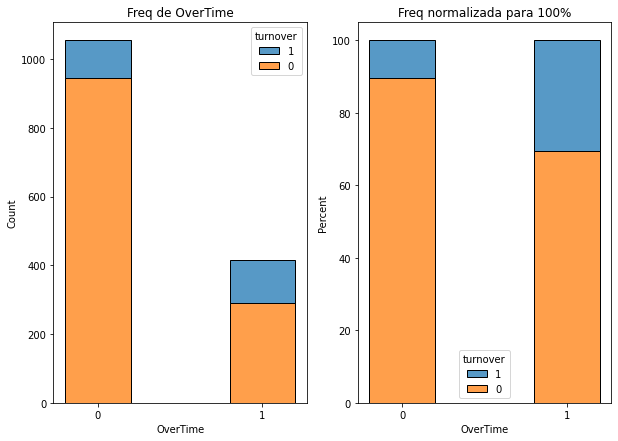

In [ ]:
plt.subplots(1,2,figsize=(10,7))
plt.subplot(1,2,1)
sns.histplot(df[['OverTime','turnover']].astype('str').sort_values(by=['OverTime']), hue_order = ['1','0'],
             x = 'OverTime', hue = 'turnover', palette = 'tab10', multiple="stack",shrink=0.4)
plt.title('Freq de OverTime')

plt.subplot(1,2,2)
sns.histplot(df[df['OverTime'] == 0][['OverTime','turnover']].astype('str').sort_values(by=['OverTime']), 
             x = 'OverTime', hue = 'turnover', palette = 'tab10', multiple="stack", stat='percent', hue_order = ['1','0'], shrink=0.4)

sns.histplot(df[df['OverTime'] == 1][['OverTime','turnover']].astype('str').sort_values(by=['OverTime']), 
             x = 'OverTime', hue = 'turnover', palette = 'tab10', multiple="stack", stat='percent', hue_order = ['1','0'], shrink=0.4)
plt.title('Freq normalizada para 100%')

plt.show()

Do histograma, vemos que a proporção de pessoas que tendem a sair da empresa é maior no grupo de pessoas que faz horas extras o que pode indicar que nossa hipótese seja verdadeira.  

Das variáveis restantes, a variável 'JobSatisfaction' provavelmente possui um alto grau de correlação com a variável 'turnover' uma vez que funcionarios insatisfeitos são mais propensos a sair da empresa. A combinação de 'JobSatisfaction' e 'OverTime' ainda pode dar uma visão mais clara sobre a variável turnover. Espera-se que quanto menor a 'JobSatisfaction' maior a taxa de 'turnover'.

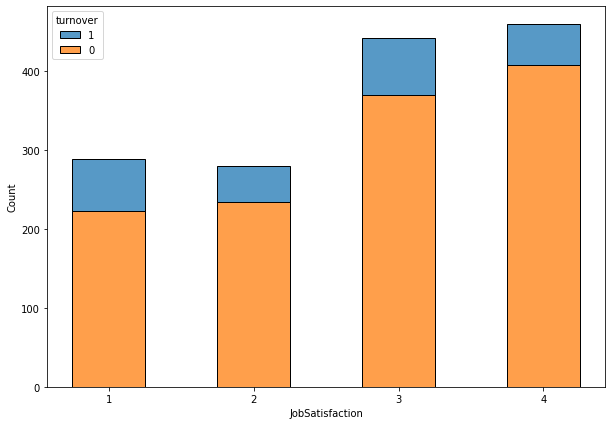

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(df[['JobSatisfaction','turnover']].astype('str').sort_values(by=['JobSatisfaction']),
             x = 'JobSatisfaction', hue_order = ['1','0'], hue = 'turnover', palette = 'tab10', multiple="stack", shrink=0.5)
plt.show()

O gráfico, vemos que a proporção de pessoas que tendem a sair da empresa é praticamente a mesma em todos os níveis de 'JobSatisfaction' o que indica pouca relação com a variável 'turnover'. Com esse indicador, não há motivos para estender o estudo a combinação de 'JobSatisfaction' e 'OverTime' juntas.

Outro fator que leva a saída de um cargo é a presença de oportunidades melhores no mercado. Sendo assim, espera-se que funcionários mal remunerados sejam mais propensos a sair da empresa.

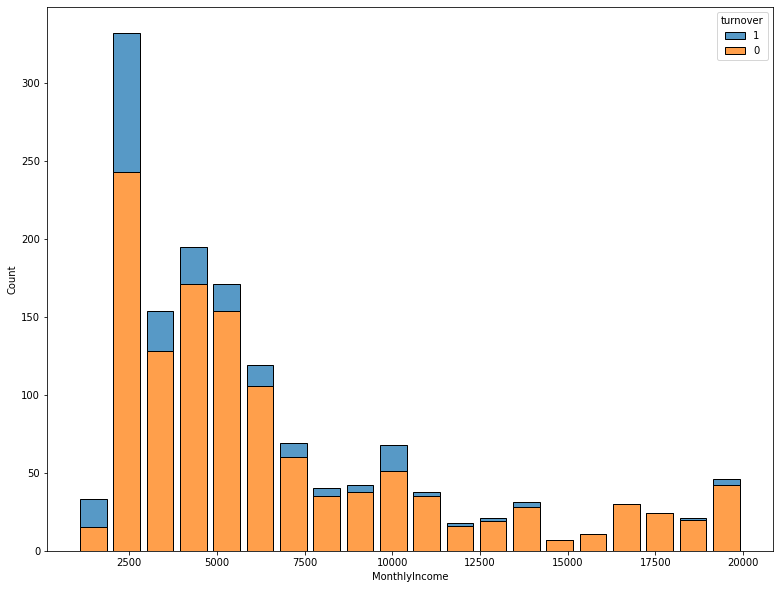

In [ ]:
plt.figure(figsize=(13,10))
sns.histplot(df[['MonthlyIncome','turnover']], x = 'MonthlyIncome', hue = 'turnover', 
             hue_order = [1,0], palette = 'tab10', multiple = 'stack', shrink=0.8)
plt.show()

Seguindo a hipótese, a distribuição dos salários mostra que quanto menor a 'MonthlyIncome' maior a concentração de pessoas que tendem a sair da empresa.  

Agora, combinando as informações obtidas:

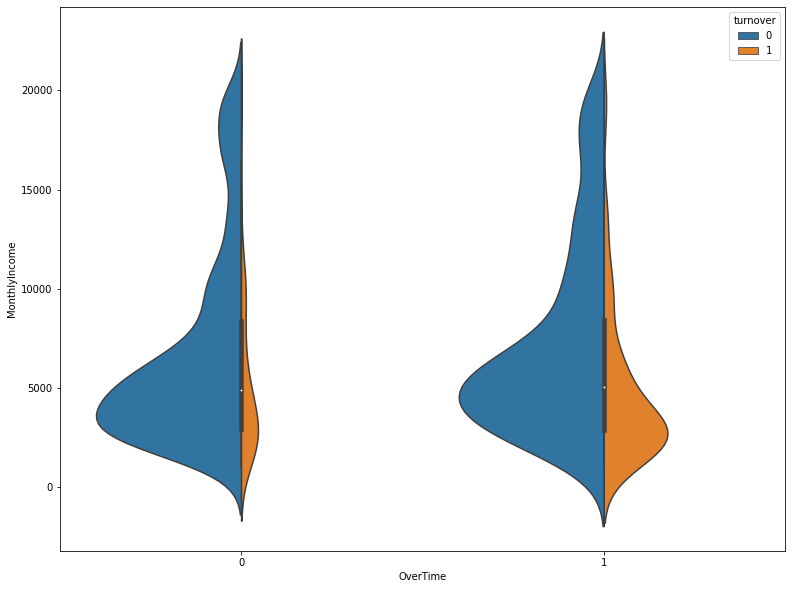

In [ ]:
plt.figure(figsize=(13,10))
sns.violinplot(x="OverTime", y="MonthlyIncome", hue="turnover",
                    data=df[['MonthlyIncome','turnover', 'OverTime']], palette="tab10", split=True, scale="count")
plt.show()

Cruzando as informações, podemos ver que funcionários mal pagos e que fazem horas extras são muito mais propensos a sair da empresa em relação aos que são bem pagos (pelo topo das visualizações) ou que não fazem hora extra (pela comparação entre as visualizações).

Neste ponto, podemos concluir que há variáveis com alto grau de correlação ('Overtime', 'MonthlyIncome' e 'YearsAtCompany') com a variável 'turnover' enquanto outras ('JobSatisfaction') não são tão relevantes.

# Exercicio 2. (1 ponto)
Faça seleção de características e selecione as 8 variáveis mais importantes. Escreva quais são elas e destaque as variáveis que estão presentes nas ideias apresentadas no exercício 1.

Primeiramente precisamos de dados devidamente preparados para os métodos que serão aplicados para seleção das variáveis mais importantes.  
Além do tratamento feito no início deste trabalho, há alguns outros pontos que precisam ser observados.


In [ ]:
df = df.drop('Attrition',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   int64 
 9   HourlyRate                1470 non-null   int64 
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

O comando 'df.info()' mostra que ainda existem variáveis categóricas que precisam ser tratadas, também há variáveis categoricas com valores númericos. Além disso, existem variáveis redundantes, por exemplo, a variável 'DailyRate' e 'MonthlyRate' tratam da mesma informação, apenas abordam períodos diferentes.  

As variáveis categóricas serão tratadas com a função 'get_dummies()' do pandas. As variáveis redundantes serão excluídas, serão mantidas as variáveis que tratam do período mensal.

In [ ]:
# Separa o dataset com variáveis categoricas não-numericas
df_categoricas = df[df.select_dtypes(include=object).columns].copy()

# Separa o dataset com variáveis categoricas numericas (transformando em 'str' no processo) e concatena com o anterior
df_categoricas_num = df[['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']].astype('str').copy()
df_categoricas = pd.concat([df_categoricas_num, df_categoricas], axis = 1)

# Exclui as colunas tratadas anteriormente e as colunas redundantes
df = df.drop(df.select_dtypes(include=object).columns, axis=1)
df = df.drop(['DailyRate','HourlyRate', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance'],axis=1)

# Criação das variáveis dummy
df_categoricas = pd.get_dummies(df_categoricas).astype('str')

# Concatenação do df para ser utilizado nos modelos
df_ajustado = pd.concat([df, df_categoricas], axis = 1)

X = df_ajustado.drop(['turnover'], axis=1)
y = df_ajustado['turnover']

In [ ]:
# Conforme apresentado em aula, utilizarei a decision tree para decidir qual as 8 variáveis mais importantes
# DecisionTree utiliza comparações então a normalização não é necessaria

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2)

seletor = DecisionTreeClassifier(random_state=10, min_impurity_decrease=0.001)
seletor = seletor.fit(X_train, y_train)
importances = seletor.feature_importances_
importances_indices = np.argsort(seletor.feature_importances_)[::-1][0:8]

print(f"As variáveis mais importantes são: {X.iloc[:,importances_indices].columns}")

Index(['MonthlyIncome', 'OverTime', 'Age', 'MonthlyRate', 'DistanceFromHome',
       'TotalWorkingYears', 'YearsSinceLastPromotion', 'StockOptionLevel_0'],
      dtype='object')

# Exercicio 3. (2 pontos)
Construa um modelo de árvore de decisão. Obtenha os valores das métricas: acurácia, precisão e sensitividade.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.iloc[:,importances_indices], y, random_state = 42, test_size = 0.2)

dt = DecisionTreeClassifier(random_state=10, min_impurity_decrease=0.001)
dt = dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

metricas(y_test,y_pred)

Acurácia: 0.8435
Precisão: 0.3478
Recall: 0.2051


# Exercicio 4. (1 ponto)
Faça a representação da árvore e observe como foi realizado cada ramificação. Explique o que é GINI e quais seriam as desvantagens?

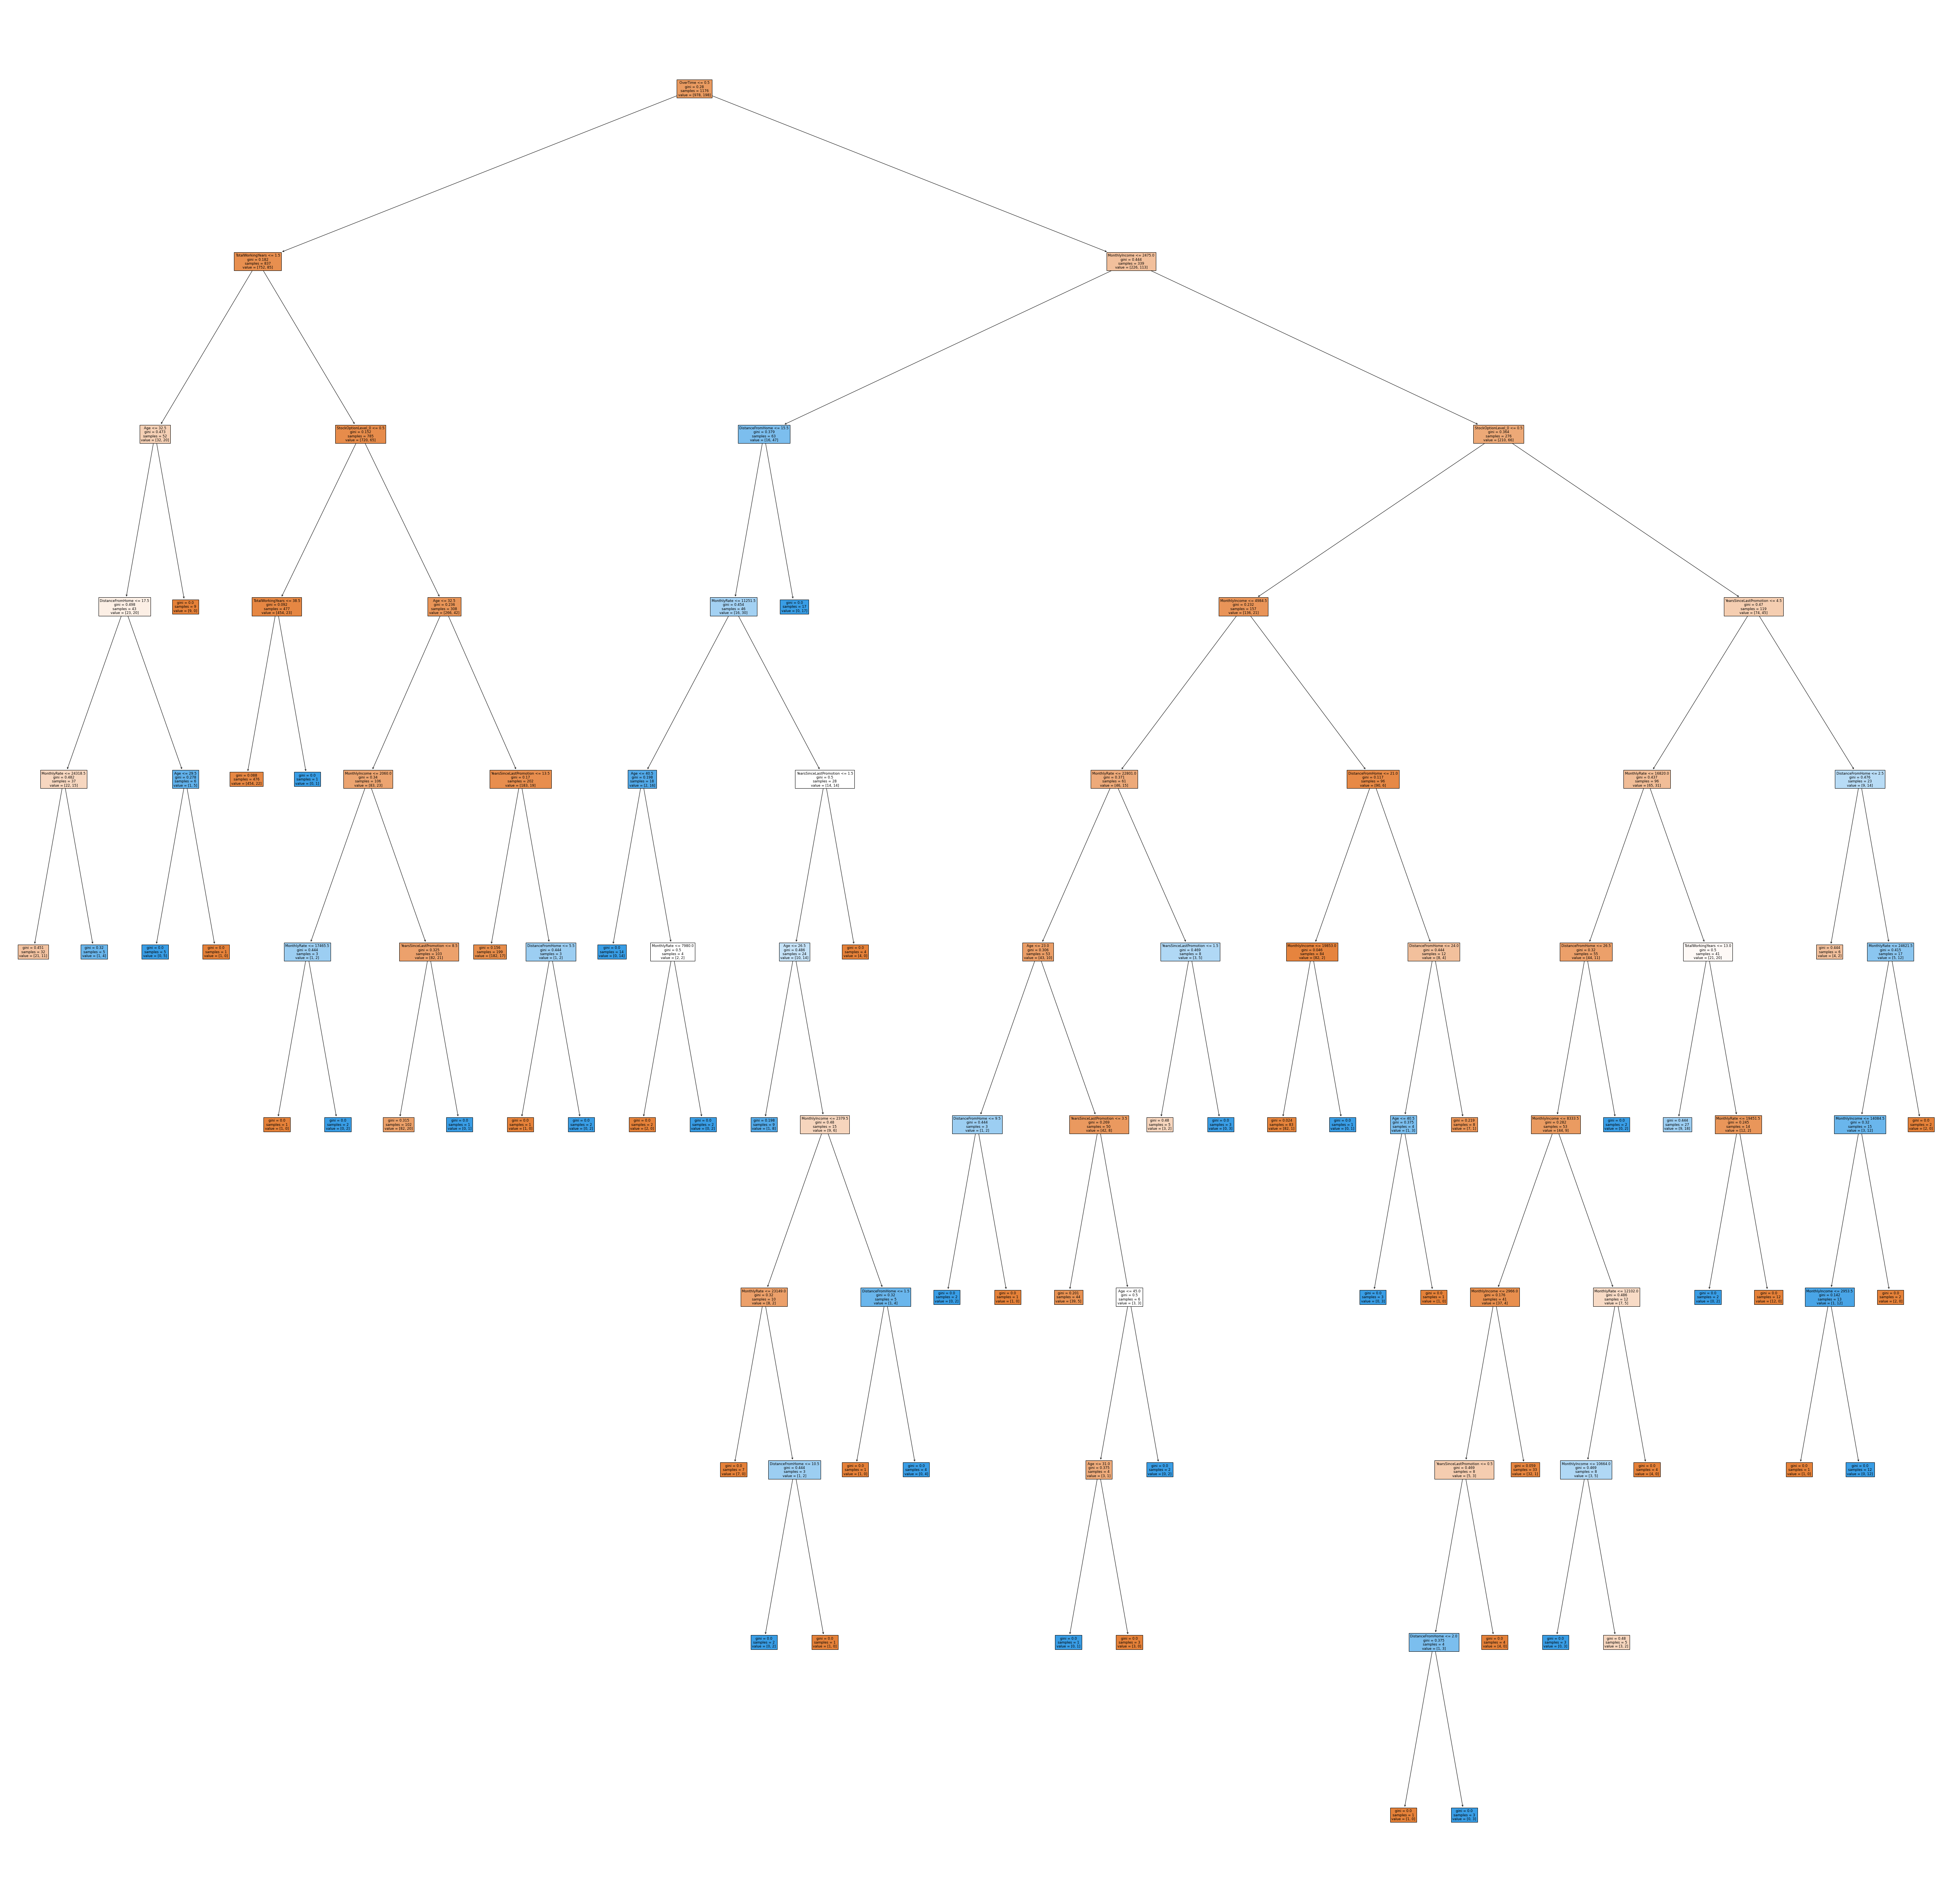

In [ ]:
plt.figure(figsize=(90,90))
plot_tree(dt, filled=True, impurity=True, feature_names=X_train.columns)

plt.show()

A árvore utiliza os atributos mais importantes (os atributos com o maior ganho de informação) para realizar a tarefa de "dividir para conquistar". Analisando a arvore desenvolvida neste trabalho, a variável 'OverTime' é a que traz o maior ganho de informação trazendo a melhor separação possível entre os rótulos (1 e 0 na variável 'turnover'), os valores de 'OverTime' formam ramos que são analisados em função dos critérios de parada, caso estes critérios NÃO sejam atingidos, a função se repete de forma recursiva analisando novas variáveis, formando novos ramos até atingir os critérios de parada onde são formadas as folhas.

Para selecionar os melhores atributos, o algoritmo analisa a qualidade de uma divisão. Uma das métricas para se definir essa qualidade é o índice de GINI, o GINI varia de 0 até 1 e analisa a impureza nos nós da arvore. Quanto mais homogêneo (valores pertencentes a uma única classe), menor o índice de GINI e consequentemente maior a sua qualidade para as divisões de uma árvore de decisão.

O grande problema das arvores de decisão utilizando o GINI está em sua estabilidade. A arvore de decisão não lida bem com qualquer conjunto de dados e esses problemas são refletidos diretamente nos valores do índice GINI. A arvore de decisão realizada neste trabalho, por exemplo, utiliza um dataset extremamente desbalanceado, das 1470 amostras temos:


*   'turnover' = 0 ---> 1233 observações
*   'turnover' = 1 ---> 237 observações

Quando analisamos o índice GINI, o 1º nó da arvore, sem nenhuma ramificação, já apresenta um valor muito baixo devido a essa discrepância (gini = 0.28), devido a isso, a complexidade do modelo aumenta e se torna difícil para o algoritmo realizar classificações de boa qualidade. Isso fica evidenciado nas métricas, apesar de uma acurácia aceitável, temos valores ruins de precisão e recall (causados por classificações erradas em verdadeiros positivos ['turnover' = 1]).



# Exercicio 5. (3 pontos)
Chamamos de overfitting (superajuste) a situação onde um modelo "decora" como predizer o conjunto de treino, mas tende a errar muito ao predizer o conjunto de teste. Dizemos que este modelo não generaliza, não consegue lidar com dados novos. Vimos dois modelos de diferentes estrategias de aprendizado por agrupamento durante as aulas. Qual destes modelos tem maior chance de sofrer um overfitting e por quê?

Nós analisamos duas estratégias em aula: Bagging (Random Forest) e Boosting (AdaBoost e LightGBM). Das técnicas, a mais propensa a Overfitting é o Boosting. A técnica de Bagging cria diversos modelos descorrelacionados e com subconjuntos de dados diferentes, retornando a média (em casos de regressão) ou maioria (em casos de classificação). O Boosting trata da construção de modelos sucessivos que busca classificar corretamente os exemplos classificados como incorretos na iteração anterior, sempre associado pesos maiores a esses erros a cada iteração. Sendo assim, eventualmente, modelos baseados em boosting irão tender ao overfitting já que buscam sempre minimizar os erros a cada iteração.

# Exercicio 6. (1 ponto)
Você recomendaria o seu modelo para uma empresa utilizar em seu setor de Recursos Humanos? Como você explicaria para um setor que não possui conhecimento algum sobre Ciência de Dados que um modelo com 100% de acurácia é impossível de se obter?

Não recomendaria. Ao olhar para as métricas, vemos que o modelo possui uma acurácia aceitável, porém, apresenta um desempenho ruim quando analisamos precisão e sensitividade (recall), isso acontece porque o modelo é uma simples arvore de decisão e esse modelo é uma técnica de machine learning que não é adequada para um dataset com as características apresentadas (dados extremamente desbalanceados). Por exemplo, numa situação em que o modelo fizesse todas as predições igual a 0 para a variável 'turnover', sua acurácia ainda seria alta (devido ao desbalanceamento) apesar de não acertar um único exemplo positivo.

Primeiramente, eu explicaria as implicações de um modelo com 100% de acurácia e como um modelo desse tipo tende a "decorar" os dados de treino e teria um desempenho ruim em qualquer situação de teste ou com dados reais. Tentaria também mostrar "na prática" como um modelo sobre ajustado é ineficiente criando arvores de decisão muito complexas ou modelos de boosting com muitas iterações, criando visualizações se necessário.
